# Статистический анализ данных сервиса аренды самокатов GoFast

**Описание проекта**

Основная цель проекта: проанализировать данные сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

Сервисом можно пользоваться:
1. без подписки:
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;
2. с подпиской Ultra:
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.

**Описание исходных данных**

В исходных данных есть информация о пользователях, их поездках и подписках, сгруппированных в файлы.

1. Пользователи — *'users_go.csv'*:
 - 'user_id' - уникальный идентификатор пользователя;
 - 'name' - имя пользователя;
 - 'age' - возраст;
 - 'city' - город;
 - 'subscription_type' - тип подписки (free, ultra). 

2. Поездки — *'rides_go.csv'*:
 - user_id' - уникальный идентификатор пользователя;
 - 'distance' - расстояние, которое пользователь проехал в текущей сессии (в метрах);
 - 'duration' - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
 - 'date' - дата совершения поездки.

3. Подписки — *'subscriptions_go.csv'*:
 - 'subscription_type' - тип подписки;
 - 'minute_price' - стоимость одной минуты поездки по данной подписке;
 - 'start_ride_price' - стоимость начала поездки;
 - 'subscription_fee' - стоимость ежемесячного платёж. 


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-0.-Загрузка-и-настройка-библиотек" data-toc-modified-id="Шаг-0.-Загрузка-и-настройка-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 0. Загрузка и настройка библиотек</a></span></li><li><span><a href="#Шаг-1.-Загрузка-данных" data-toc-modified-id="Шаг-1.-Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 1. Загрузка данных</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Корректировка-типов-данных-столбцов" data-toc-modified-id="Корректировка-типов-данных-столбцов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Корректировка типов данных столбцов</a></span></li><li><span><a href="#Добавление-столбцов" data-toc-modified-id="Добавление-столбцов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Добавление столбцов</a></span></li><li><span><a href="#Обработка-неявных-дубликатов" data-toc-modified-id="Обработка-неявных-дубликатов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обработка неявных дубликатов</a></span></li><li><span><a href="#Проверка-результатов-предобработки-данных" data-toc-modified-id="Проверка-результатов-предобработки-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка результатов предобработки данных</a></span></li></ul></li><li><span><a href="#Шаг-3.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг-3.-Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 3. Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Частота-встречаемости-городов" data-toc-modified-id="Частота-встречаемости-городов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Частота встречаемости городов</a></span></li><li><span><a href="#Соотношение-пользователей-с-подпиской-и-без-нее" data-toc-modified-id="Соотношение-пользователей-с-подпиской-и-без-нее-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Соотношение пользователей с подпиской и без нее</a></span></li><li><span><a href="#Возраст-пользователей" data-toc-modified-id="Возраст-пользователей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Возраст пользователей</a></span></li><li><span><a href="#Расстояние,-которое-пользователь-преодолел-за-одну-поездку" data-toc-modified-id="Расстояние,-которое-пользователь-преодолел-за-одну-поездку-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Расстояние, которое пользователь преодолел за одну поездку</a></span></li><li><span><a href="#Продолжительность-поездок" data-toc-modified-id="Продолжительность-поездок-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Продолжительность поездок</a></span></li><li><span><a href="#Промежуточные-выводы-исследовательского-анализа" data-toc-modified-id="Промежуточные-выводы-исследовательского-анализа-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Промежуточные выводы исследовательского анализа</a></span></li></ul></li><li><span><a href="#Шаг-4.-Объединение-данных" data-toc-modified-id="Шаг-4.-Объединение-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 4. Объединение данных</a></span><ul class="toc-item"><li><span><a href="#Объединение-данных-о-пользователях,-поездках-и-подписках-в-один-датафрейм-методом-merge()" data-toc-modified-id="Объединение-данных-о-пользователях,-поездках-и-подписках-в-один-датафрейм-методом-merge()-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Объединение данных о пользователях, поездках и подписках в один датафрейм методом merge()</a></span></li><li><span><a href="#Создание-двух-датафреймов-с-пользователями,-имеющими-подписку-и-без-нее,-на-основе-общего-датафрейма" data-toc-modified-id="Создание-двух-датафреймов-с-пользователями,-имеющими-подписку-и-без-нее,-на-основе-общего-датафрейма-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Создание двух датафреймов с пользователями, имеющими подписку и без нее, на основе общего датафрейма</a></span></li><li><span><a href="#Визуализация-данных-из-датафреймов,-разделенных-на-пользователей-с-подпиской-и-без" data-toc-modified-id="Визуализация-данных-из-датафреймов,-разделенных-на-пользователей-с-подпиской-и-без-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Визуализация данных из датафреймов, разделенных на пользователей с подпиской и без</a></span></li></ul></li><li><span><a href="#Шаг-5.-Подсчёт-выручки" data-toc-modified-id="Шаг-5.-Подсчёт-выручки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг 5. Подсчёт выручки</a></span><ul class="toc-item"><li><span><a href="#Создание-датафрейма,-агрегированного-по-пользователям,-на-основе-'total_go'" data-toc-modified-id="Создание-датафрейма,-агрегированного-по-пользователям,-на-основе-'total_go'-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Создание датафрейма, агрегированного по пользователям, на основе 'total_go'</a></span></li><li><span><a href="#Добавление-столбца-в-агрегированный-датафрейм-с-помесечной-выручкой-по-каждому-пользователю" data-toc-modified-id="Добавление-столбца-в-агрегированный-датафрейм-с-помесечной-выручкой-по-каждому-пользователю-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Добавление столбца в агрегированный датафрейм с помесечной выручкой по каждому пользователю</a></span></li></ul></li><li><span><a href="#Шаг-6.-Проверка-гипотез" data-toc-modified-id="Шаг-6.-Проверка-гипотез-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Шаг 6. Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Тратят-ли-пользователи-с-подпиской-больше-времени-на-поездки,-чем-без-неё?" data-toc-modified-id="Тратят-ли-пользователи-с-подпиской-больше-времени-на-поездки,-чем-без-неё?-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Тратят ли пользователи с подпиской больше времени на поездки, чем без неё?</a></span></li><li><span><a href="#Расстояние,-которое-проезжают-пользователи-с-подпиской-за-одну-поездку,-не-превышает-3130-метров?" data-toc-modified-id="Расстояние,-которое-проезжают-пользователи-с-подпиской-за-одну-поездку,-не-превышает-3130-метров?-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?</a></span></li><li><span><a href="#Помесчячная-выручка-от-пользователей-с-подпиской-выше,-чем-выручка-от-пользователей-без-подписки?-Сделать-выводы" data-toc-modified-id="Помесчячная-выручка-от-пользователей-с-подпиской-выше,-чем-выручка-от-пользователей-без-подписки?-Сделать-выводы-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Помесчячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки? Сделать выводы</a></span></li><li><span><a href="#Каким-тестом-проверить-гипотезу-о-снижении-количества-пользовательских-обращений-после-обновления-сервиса,-с-которым-взаимодействует-мобильное-приложение?" data-toc-modified-id="Каким-тестом-проверить-гипотезу-о-снижении-количества-пользовательских-обращений-после-обновления-сервиса,-с-которым-взаимодействует-мобильное-приложение?-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Каким тестом проверить гипотезу о снижении количества пользовательских обращений после обновления сервиса, с которым взаимодействует мобильное приложение?</a></span></li></ul></li><li><span><a href="#Шаг-7.-Распределения" data-toc-modified-id="Шаг-7.-Распределения-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Шаг 7. Распределения</a></span></li><li><span><a href="#Выводы-проекта" data-toc-modified-id="Выводы-проекта-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Выводы проекта</a></span></li></ul></div>

#### Шаг 0. Загрузка и настройка библиотек

In [1]:
# Датасеты
import pandas as pd

# Математика
import numpy as np

# Факториалы для комбинатрики
from math import factorial

# Статистика и тервер
from scipy import stats as st

# Графики
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault
import seaborn as sns

# Копирование значений, а не ссылок, через b = copy.deepcopy(a)
import copy


In [2]:
# Обязательно для нормального отображения графиков plt
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
# Дополнительно и не обязательно для декорирования графиков
factor = .8
default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = default_dpi * factor

#### Шаг 1. Загрузка данных

In [3]:
# Чтение данных
try:
    users_go = pd.read_csv('/datasets/users_go.csv') 
    rides_go = pd.read_csv('/datasets/rides_go.csv') 
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv') 
except:
    users_go = pd.read_csv('datasets/users_go.csv') 
    rides_go = pd.read_csv('datasets/rides_go.csv') 
    subscriptions_go = pd.read_csv('datasets/subscriptions_go.csv') 
    

In [4]:
# Отображение всех колонок при выводе на печать
pd.set_option('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 412.6 KB
None

           user_id          age
count  1565.000000  1565.000000
mean    762.633866    24.922045
std     443.260155     4.553496
min       1.000000    12.000000
25%     378.000000    22.000000
50%     762.000000    25.000000
75%    1146.000000    28.000000
max    1534.000000    43.000000


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


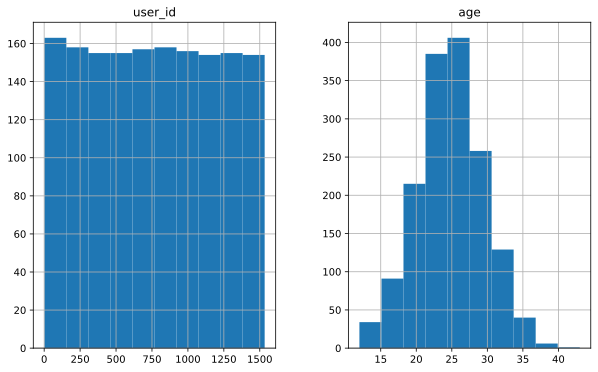

In [5]:
# Изучение датафрейма 'users_go' 
print(users_go.info(memory_usage='deep')) 
print()
print(users_go.describe())
users_go.hist()
users_go.head()


Датафрейм 'users_go' имеет 5 столбцов и 1565 строк без пропусков и выбросов. Вес датафрейма 412.6 Кб. Типы столбцов 'user_id', 'age', 'subscription_type' имеют не оптимальные типы данных, их корректировка может снизить вес датафрейма. Названия столбцов соответствуют 'змеиному' стилю. Есть дубликаты идентификаторов в столбце 'user_id'.

In [6]:
# Уникальные идентификаторы
print(len(users_go['user_id'].unique()), 'уникальных значений из', users_go['user_id'].count(), 'строк')
print('От', users_go['user_id'].min(), 'до', users_go['user_id'].max())


1534 уникальных значений из 1565 строк
От 1 до 1534


В 'user_id' обнаружены дубликаты идентификаторов. Имеющиеся значения позволяют использовать для этого столбца тип данных 'uint16'. 

In [7]:
# Уникальные возрасты
print(len(users_go['age'].unique()), 'уникальных значений из', users_go['age'].count(), 'строк')
print('От', users_go['age'].min(), 'до', users_go['age'].max())


29 уникальных значений из 1565 строк
От 12 до 43


Данные в столбце 'age' позволяют использовать для него тип данных 'uint8'. 

In [8]:
# Уникальные названия населенных пунктов
users_go['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявные дубликаты в столбце 'city' не обнаружены.

In [9]:
# Уникальные типы
users_go['subscription_type'].unique()


array(['ultra', 'free'], dtype=object)

Имеющиеся значения в столбце 'subscription_type' позволяют изменить 'ultra' и 'free' на True и False соответственно, а также использовать для этого столбца тип данных 'bool'. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None

            user_id      distance      duration
count  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011
std      434.734317   1116.831209      6.091051
min        1.000000      0.855683      0.500000
25%      487.000000   2543.226360     13.597563
50%      889.000000   3133.609994     17.678395
75%     1213.250000   3776.222735     21.724800
max     1534.000000   7211.007745     40.823963


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


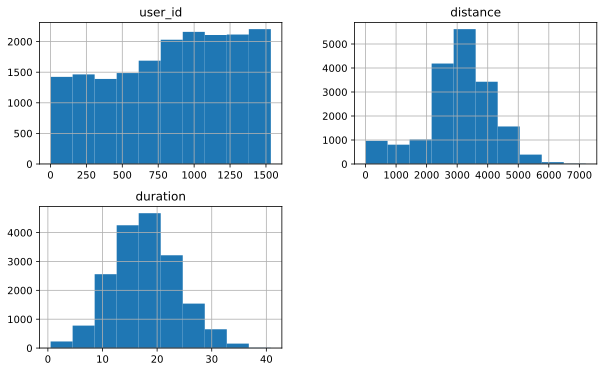

In [10]:
# Изучение датафрейма 'rides_go' 
print(rides_go.info())
print()
print(rides_go.describe())
rides_go.hist() 
rides_go.head()


В датафрейме 'rides_go' обнаружены 4 столбца и 18068 строк без пропусков и выбросов. Вес датафрейма 564.8 Кб. Типы столбцов 'user_id' и 'date' не оптимальны. Корректировка типов этих столбцов снизит потребление памяти и позволит раскрыть их потенциал. Названия столбцов соответствуют 'змеиному' стилю. Возможно наличие выбросов в столбцах 'distance' и 'duration'. 

In [11]:
# Уникальные идентификаторы
print(len(rides_go['user_id'].unique()), 'уникальных идентификаторов из', rides_go['user_id'].count(), 'строк')
print('От', rides_go['user_id'].min(), 'до', rides_go['user_id'].max())


1534 уникальных идентификаторов из 18068 строк
От 1 до 1534


Имеющиеся значения в столбце 'user_id' позволяют использовать для этого столбца тип данных 'uint16'.

In [12]:
# Изучение датафрейма 'subscriptions_go' 
print(subscriptions_go.info())
subscriptions_go.head() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В датафрейме обнаружены 4 столбца и 2 строки без пропусков и выбросов. Не оптимальные типы данных во всех столбцах. Это не является критичным при весе датафрейма в 192 байта. Если тип данных в столбце 'subscription_type' датафрейма 'users_go' будет изменён, то и в данном датафрейме одноимённый столбец требуется привести в соответствие. Названия столбцов соответствуют 'змеиному' стилю. 

#### Шаг 2. Предобработка данных

##### Корректировка типов данных столбцов

In [13]:
# Корректировка столбцов в 'users_go'
users_go['user_id'] = users_go['user_id'].astype('uint16')
users_go['age'] = users_go['age'].astype('uint8')
users_go.loc[users_go['subscription_type'] == 'ultra', 'subscription_type'] = True # 'ultra'
users_go.loc[users_go['subscription_type'] == 'free', 'subscription_type'] = False # 'free'
users_go['subscription_type'] = users_go['subscription_type'].astype('bool')

# Корректировка столбца 'date' в датафейме 'rides_go'
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

# Корректировка столбца 'subscription_type' в датафейме 'subscriptions_go'
subscriptions_go.loc[subscriptions_go['subscription_type'] == 'ultra', 'subscription_type'] = True # 'ultra'
subscriptions_go.loc[subscriptions_go['subscription_type'] == 'free', 'subscription_type'] = False # 'free'
subscriptions_go['subscription_type'] = subscriptions_go['subscription_type'].astype('bool')
for i in ['minute_price', 'start_ride_price', 'subscription_fee']:
    subscriptions_go[i] = subscriptions_go[i].astype('uint8')


##### Добавление столбцов

In [14]:
# Добавление столбца 'month' с номером месяца в датафейм 'rides_go'
rides_go['month'] = pd.DatetimeIndex(rides_go['date']).month

##### Обработка неявных дубликатов

In [15]:
# Удаление дубликатов идентификаторов в столбце 'user_id' датафрейма 'users_go'
users_go = users_go.sort_values(by='user_id').loc[users_go['user_id'].duplicated() == False]

In [16]:
# Проверка наличия дубликатов в 'users_go'
users_go.sort_values(by='user_id').loc[users_go['user_id'].duplicated() == True].count()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Строки с дубликатами в поле 'user_id' удалены из 'users_go'.

##### Проверка результатов предобработки данных

In [17]:
# Датафейм 'users_go'
users_go.info()
users_go.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   uint16
 1   name               1534 non-null   object
 2   age                1534 non-null   uint8 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   bool  
dtypes: bool(1), object(2), uint16(1), uint8(1)
memory usage: 41.9+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,True
1,2,Станислав,31,Омск,True
2,3,Алексей,20,Москва,True
3,4,Константин,26,Ростов-на-Дону,True
4,5,Адель,28,Омск,True


Предобработка датафрейма сократила количество строк в нем с 1565 до 1534, а его вес почти в 10 раз с 412.6 Кб до 41.9 Кб.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB
None

   user_id     distance   duration       date  month
0        1  4409.919140  25.599769 2021-01-01      1
1        1  2617.592153  15.816871 2021-01-18      1
2        1   754.159807   6.232113 2021-04-20      4
3        1  2694.783254  18.511000 2021-08-11      8
4        1  4028.687306  26.265803 2021-08-28      8

            user_id      distance      duration         month
count  18068.000000  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011   

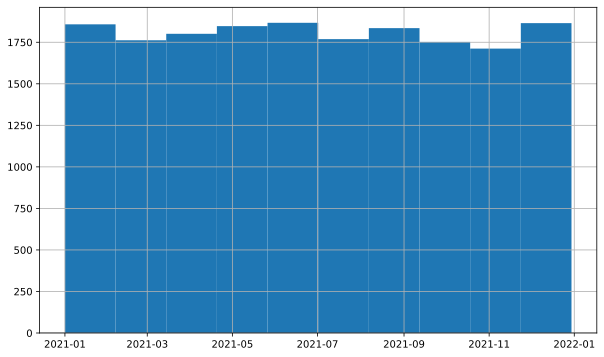

In [18]:
# Датафейм 'rides_go'
print(rides_go.info())
print()
print(rides_go.head())
print()
print(rides_go.describe())
print()
print('Анализ дат:')
print('Минимальная дата :', rides_go['date'].min())
print('Максимальная дата:', rides_go['date'].max())
rides_go['date'].hist()
plt.show()

В процессе предобработки данных в датафрейме 'rides_go' был добавлен столбец 'month' и изменены типы данных столбцов. В результате вес датафрейма вырос с 564.8 Кб до 705.9 Кб. Однако, без корректировки типов данных, вес датафрейма был бы еще больше. Также проверены данные в столбце с датами. Диапазон дат с 01.01.2021 по 30.12.2021. В пределах этого диапазона дат количество значений относительно равномерно распределено.

In [19]:
# Датафейм 'subscriptions_go'
subscriptions_go.info()
subscriptions_go.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   subscription_type  2 non-null      bool 
 1   minute_price       2 non-null      uint8
 2   start_ride_price   2 non-null      uint8
 3   subscription_fee   2 non-null      uint8
dtypes: bool(1), uint8(3)
memory usage: 136.0 bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,False,8,50,0
1,True,6,0,199


In [20]:
# Функция для более наглядного отображения значений
# 'ultra' и 'free' в поле 'subscription_type' разных датафреймов
def subscriptions_go_translate(data):
    result = copy.deepcopy(data)
    result.loc[result['subscription_type'] == True, 'subscription_type'] = 'ultra'
    result.loc[result['subscription_type'] == False, 'subscription_type'] = 'free'
    return result

subscriptions_go_translate(subscriptions_go).head()


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Предобработка датафрейма сократила его вес почти в 10 раз с 192 до 136 байт.

#### Шаг 3. Исследовательский анализ данных

Описание и визуализация общей информации о пользователях и поездках

In [21]:
# Группировка значений
def quality_go_groupby(data, column):
    if 'subscription_fee' in subscriptions_go.columns:
        result = subscriptions_go_translate(data).groupby([column])[column].agg(['count']).sort_values(by='count')
    else:
        result = data.groupby([column])[column].agg(['count']).sort_values(by='count')
    #result = data.groupby([column])[column].agg(['count']).sort_values(by='count')
    #, ascending=False)
    result['percent'] = result['count'] / result['count'].sum()
    return result


In [22]:
# Функции визуализации столбцов с качественными данными
def quality_go(data, column, xlabel, ylabel, title):
    print('Название столбца:', column)
    go = quality_go_groupby(data, column)
    go.columns = {'Количество':'count', 'Доля':'percent'}
    
    #quality_go_groupby(data, column).plot(kind='bar')
    
    plt.barh(
        go.index, 
        go['Количество'].values
    )
    plt.gca().set(xlabel=f'${xlabel}$', ylabel=f'${ylabel}$')
    plt.title(f'{title}')
    plt.show()
    
    print('Значения датафрейма:')
    print(go)
    print('\nОписание датафрейма:')
    print(go.describe())

In [23]:
# Функция визуализации столбцов с количественными данными
def quantity_go(data, column, bins_num, xlabel, ylabel, title):
    print('Название столбца:', column)
    data[column].hist(bins=bins_num)
    plt.gca().set(xlabel=f'${xlabel}$', ylabel=f'${ylabel}$')
    plt.title(f'{title}')
    plt.show()
    print('Описание датафрейма:')
    print(data[column].describe().round(0))

##### Частота встречаемости городов

Название столбца: city


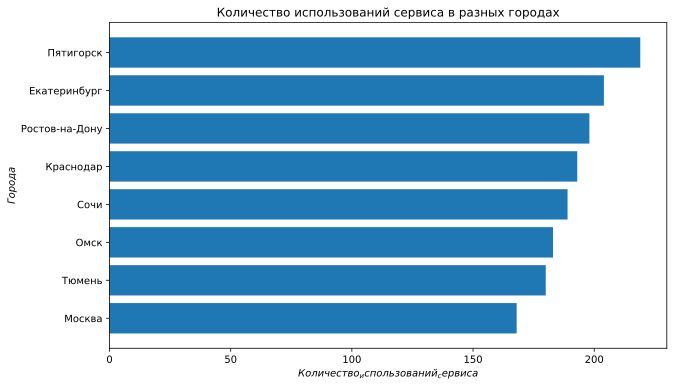

Значения датафрейма:
                Количество      Доля
city                                
Москва                 168  0.109518
Тюмень                 180  0.117340
Омск                   183  0.119296
Сочи                   189  0.123207
Краснодар              193  0.125815
Ростов-на-Дону         198  0.129074
Екатеринбург           204  0.132986
Пятигорск              219  0.142764

Описание датафрейма:
       Количество      Доля
count    8.000000  8.000000
mean   191.750000  0.125000
std     15.672998  0.010217
min    168.000000  0.109518
25%    182.250000  0.118807
50%    191.000000  0.124511
75%    199.500000  0.130052
max    219.000000  0.142764


In [24]:
quality_go(
    users_go, 
    'city', 
    'Количество_ использований_ сервиса', 
    'Города', 
    'Количество использований сервиса в разных городах'
)


Лидером по частотности является Пятигорск (219 строк). Следом идут Екатеринбург (204 строки) и Ростов-на-Дону (198 строк). Антилидер - Москва (168 строк).

##### Соотношение пользователей с подпиской и без нее

Название столбца: subscription_type


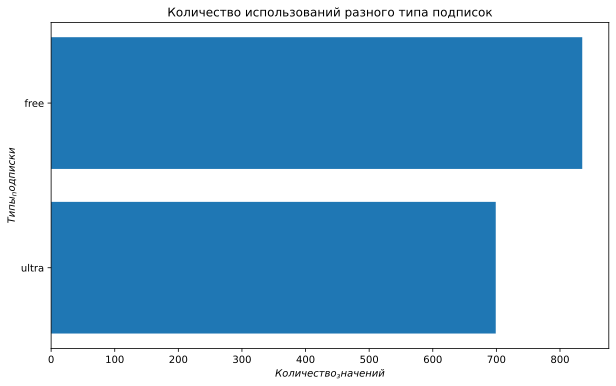

Значения датафрейма:
                   Количество      Доля
subscription_type                      
ultra                     699  0.455671
free                      835  0.544329

Описание датафрейма:
       Количество      Доля
count    2.000000  2.000000
mean   767.000000  0.500000
std     96.166522  0.062690
min    699.000000  0.455671
25%    733.000000  0.477836
50%    767.000000  0.500000
75%    801.000000  0.522164
max    835.000000  0.544329


In [25]:
quality_go(
    users_go, 
    'subscription_type', 
    'Количество_ значений', 
    'Типы_ подписки', 
    'Количество использований разного типа подписок'
)


Пользователей с подпиской "free" всего 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской "ultra".

##### Возраст пользователей

Название столбца: age


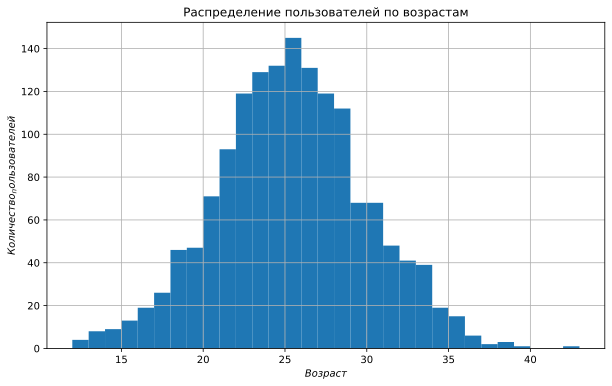

Описание датафрейма:
count    1534.0
mean       25.0
std         5.0
min        12.0
25%        22.0
50%        25.0
75%        28.0
max        43.0
Name: age, dtype: float64


In [26]:
quantity_go(
    users_go, 
    'age', 
    users_go['age'].max()-users_go['age'].min(), 
    'Возраст', 
    'Количество_ пользователей',
    'Распределение пользователей по возрастам' 
)

Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Распределение возрастной кривой имеет нормальное распределение. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.

##### Расстояние, которое пользователь преодолел за одну поездку

Название столбца: distance


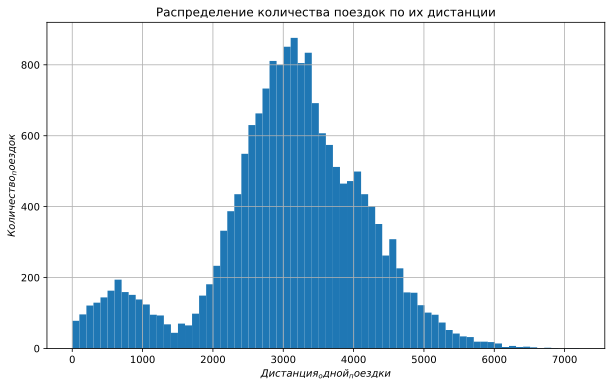

Описание датафрейма:
count    18068.0
mean      3071.0
std       1117.0
min          1.0
25%       2543.0
50%       3134.0
75%       3776.0
max       7211.0
Name: distance, dtype: float64


In [27]:
quantity_go(
    rides_go, 
    'distance', 
    int((rides_go['distance'].max()-rides_go['distance'].min()) / 100), 
    'Дистанция_ одной_ поездки', 
    'Количество_ поездок', 
    'Распределение количества поездок по их дистанции' 
)

За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.

##### Продолжительность поездок

Название столбца: duration


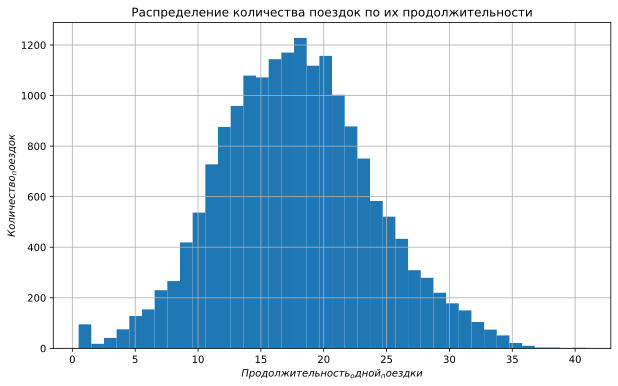

Описание датафрейма:
count    18068.0
mean        18.0
std          6.0
min          0.0
25%         14.0
50%         18.0
75%         22.0
max         41.0
Name: duration, dtype: float64


In [28]:
quantity_go(
    rides_go, 
    'duration', 
    int((rides_go['duration'].max()-rides_go['duration'].min())), 
    'Продолжительность_ одной_ поездки', 
    'Количество_ поездок', 
    'Распределение количества поездок по их продолжительности' 
)

Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной так и медианным значением. 

Наблюдается анамалия размером менее 100 поездок с продолжительностью в 1 минуту. Однако, они не являются выбрасами, т.к. подкреплены данными о поездках со столь же маленькими дистанциями.

##### Промежуточные выводы исследовательского анализа

Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.

Большая часть всех пользователей используют подписку "free". Всего их 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской "ultra".

Максимальное количество в 219 поездок совершено в Пятигорске. Минимальное количество в 168 поездок совершено в Москве.

За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.

Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной так и медианным значением. Наблюдается выброс размером менее 100 поездок с продолжительностью в 1 минуту.

#### Шаг 4. Объединение данных

##### Объединение данных о пользователях, поездках и подписках в один датафрейм методом merge()

In [29]:
# Общая таблица с данными
total_go = users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type')


In [30]:
total_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,True,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,True,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,True,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,True,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,True,4028.687306,26.265803,2021-08-28,8,6,0,199


In [31]:
print("Количество строк (поездок) в 'rides_go':", rides_go['user_id'].count())
print("Количество строк (поездок) в 'total_go':", total_go['user_id'].count())
print()
print("Количество уникальных пользователей в 'users_go':", len(users_go['user_id'].unique()))
print("Количество уникальных пользователей в 'total_go':", len(total_go['user_id'].unique()))


Количество строк (поездок) в 'rides_go': 18068
Количество строк (поездок) в 'total_go': 18068

Количество уникальных пользователей в 'users_go': 1534
Количество уникальных пользователей в 'total_go': 1534


Количество строк (записей о поездках) в 'rides_go' и в 'total_go' одинаково и равно 18068. 
Количество уникальных пользователей в 'users_go' и в 'total_go' одинаково и равно 1534.

Т.к. исходные датафреймы не содержали пропусков и количество значений в них соответствует количеству в итоговом датафрейме, то последний также не содержит пропусков. 

##### Создание двух датафреймов с пользователями, имеющими подписку и без нее, на основе общего датафрейма

In [32]:
# Датафрейм данных с пользователями с подпиской
ultra_go = total_go.loc[total_go['subscription_type'] == True]
# Датафрейм данных с пользователями без подписки
free_go = total_go.loc[total_go['subscription_type'] == False]

##### Визуализация данных из датафреймов, разделенных на пользователей с подпиской и без

In [33]:
# Функция сравнения одинаковых столбцов 
# с количественными данными в разных датафреймах
def quantity_go_comparison(data1, data2, column, bins_num, xlabel, ylabel, title, dataname1, dataname2):
    print('Сравнение столбцов:', column)
    
    data1.rename(columns = {column:dataname1})[dataname1].plot.hist(
        bins=bins_num, 
        #xlim=(data_min, data_max),
        alpha=.5, 
        legend=True,
        grid=True
    )
    data2.rename(columns = {column:dataname2})[dataname2].plot.hist(
        bins=bins_num, 
        #xlim=(data_min, data_max),
        alpha=.5, 
        legend=True,
        grid=True
    )
    
    plt.gca().set(xlabel=f'${xlabel}$', ylabel=f'${ylabel}$')
    plt.title(f'{title}')
    plt.show()
    
    print(f"Описание датафрейма 'go_{dataname1}':")
    print(data1[column].describe().round(0))
    
    print(f"\nОписание датафрейма 'go_{dataname2}':")
    print(data2[column].describe().round(0))

In [34]:
# Функции сравнения одинаковых столбцов 
# с качественными данными в разных датафреймах
def quality_go_comparison(data1, data2, column, xlabel, ylabel, title, dataname1, dataname2, sort=False):
    print('Сравнение столбцов:', column)
    
    go_count = pd.DataFrame([
        data1.groupby(column)[column].agg('count'), 
        data2.groupby(column)[column].agg('count')
    ])
    go_count.index = [dataname1, dataname2]
    go_count = go_count.transpose()
    if sort == True:
        if go_count[dataname1].sum() >= go_count[dataname2].sum():
            go_count = go_count.sort_values(by=dataname1)
        else:
            go_count = go_count.sort_values(by=dataname2)
    
    go_count.plot.barh(grid=True)
    plt.gca().set(xlabel=f'${xlabel}$', ylabel=f'${ylabel}$')
    plt.title(f'{title}')
    plt.show()
    
    go_percent_sum = go_count[dataname1].sum() + go_count[dataname2].sum()
    go_percent = go_count / go_percent_sum
    
    print('Значения датафрейма:')
    print(go_count)
    print('\nРаспределение долей всего датафрейма:')
    print(go_percent)
    print('\nОписание датафрейма:')
    print(go_count.describe())

In [35]:
ultra_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,True,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,True,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,True,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,True,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,True,4028.687306,26.265803,2021-08-28,8,6,0,199


In [36]:
free_go.head() 

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,False,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,False,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,False,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,False,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,False,3047.379435,17.427673,2021-02-14,2,8,50,0


In [37]:
ultra_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   uint16        
 1   name               6500 non-null   object        
 2   age                6500 non-null   uint8         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   bool          
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   uint8         
 10  start_ride_price   6500 non-null   uint8         
 11  subscription_fee   6500 non-null   uint8         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(2), uint16(1), uint8(4)
memory usage: 399.9+ KB


In [38]:
free_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  uint16        
 1   name               11568 non-null  object        
 2   age                11568 non-null  uint8         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  bool          
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  uint8         
 10  start_ride_price   11568 non-null  uint8         
 11  subscription_fee   11568 non-null  uint8         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(2), uint16(1), uint8(4)
memory usage: 711.7+ KB


In [39]:
print("Разница описательных значений столбцов с числовыми данными датафреймов 'free_go' и 'ultra_go'") 
free_go.describe() - ultra_go.describe()


Разница описательных значений столбцов с числовыми данными датафреймов 'free_go' и 'ultra_go'


,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.0,5068.0,5068.0
mean,771.801846,0.000711,-69.950106,-1.151076,0.100687,2.0,50.0,-199.0
std,40.066290,-0.276108,409.278476,0.754755,0.035154,0.0,0.0,0.0
min,699.000000,0.000000,-243.354755,-3.260353,0.000000,2.0,50.0,-199.0
25%,740.000000,0.000000,-418.881328,-1.566217,0.000000,2.0,50.0,-199.0
50%,772.000000,0.000000,-33.988764,-0.851263,1.000000,2.0,50.0,-199.0
75%,803.000000,0.000000,345.123469,-0.290058,0.000000,2.0,50.0,-199.0
max,835.000000,5.000000,1511.238083,-5.875464,0.000000,2.0,50.0,-199.0


Выводы из анализа разницы использования обоих типов подписки:
1. **Общее количество**. Поездок с исползьзованием подписки 'free' на 5068 больше, чем с использованием подписки 'ultra', и составляет 11568.
1. **Возраст**. Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской 'free'.
1. **Дистанция**. Дистанция поездок при использовании подписки 'free' более разнообразна. Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки 'ultra'. Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки 'free' больше на 409 метров, чем при использовании подписки 'ultra'. Средняя дистанция при использовании подписки 'free' короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем при использовании 'ultra'.
1. **Продолжительность**. Продолжительность поездок при использовании подписки 'free' немного меньше по всем показателям, чем при использовании 'ultra'. Например, минимальное время меньше на 3.26 минут, а максимальное меньше на 5.88 минут.
1. **Месяцы**. Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков 'ultra' приходится на июнь, а у подписчиков 'free' на июль. При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре.

Сравнение столбцов: age


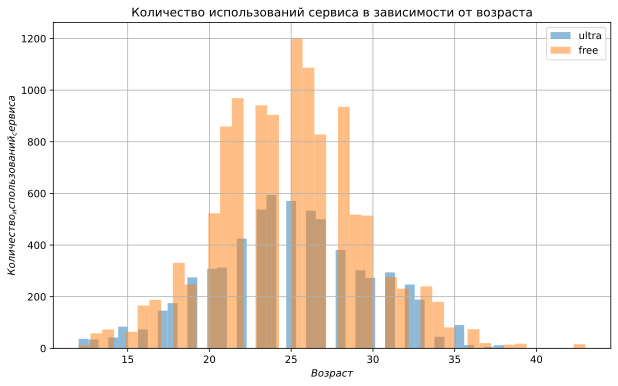

Описание датафрейма 'go_ultra':
count    6500.0
mean       25.0
std         5.0
min        12.0
25%        22.0
50%        25.0
75%        28.0
max        38.0
Name: age, dtype: float64

Описание датафрейма 'go_free':
count    11568.0
mean        25.0
std          4.0
min         12.0
25%         22.0
50%         25.0
75%         28.0
max         43.0
Name: age, dtype: float64


In [40]:
# Срвнение столбцов 'age' в 'ultra_go' и 'free_go'
quantity_go_comparison(
    ultra_go, 
    free_go, 
    'age', 
    int(free_go['age'].max()), 
    'Возраст', 
    'Количество_ использований_ сервиса', 
    'Количество использований сервиса в зависимости от возраста', 
    'ultra', 
    'free'
)

Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской 'free' и равен 43 годам.

Сравнение столбцов: city


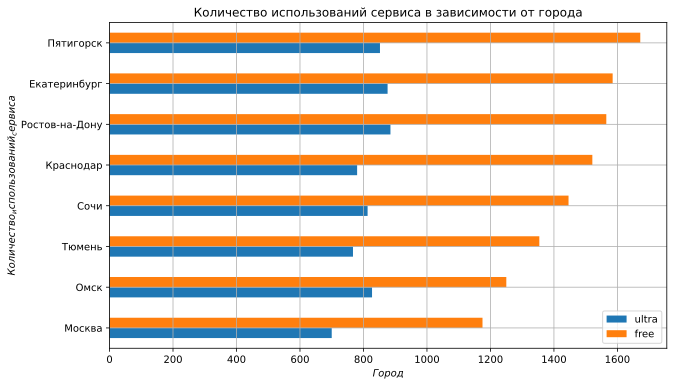

Значения датафрейма:
                ultra  free
city                       
Москва            700  1175
Омск              827  1250
Тюмень            767  1354
Сочи              813  1446
Краснодар         780  1521
Ростов-на-Дону    885  1565
Екатеринбург      876  1585
Пятигорск         852  1672

Распределение долей всего датафрейма:
                   ultra      free
city                              
Москва          0.038743  0.065032
Омск            0.045772  0.069183
Тюмень          0.042451  0.074939
Сочи            0.044997  0.080031
Краснодар       0.043170  0.084182
Ростов-на-Дону  0.048982  0.086617
Екатеринбург    0.048484  0.087724
Пятигорск       0.047155  0.092539

Описание датафрейма:
            ultra         free
count    8.000000     8.000000
mean   812.500000  1446.000000
std     61.923916   173.412802
min    700.000000  1175.000000
25%    776.750000  1328.000000
50%    820.000000  1483.500000
75%    858.000000  1570.000000
max    885.000000  1672.000000


In [41]:
# Срвнение столбцов 'city' в 'ultra_go' и 'free_go'
quality_go_comparison(
    ultra_go, 
    free_go, 
    'city', 
    'Город', 
    'Количество_ использований_ сервиса', 
    'Количество использований сервиса в зависимости от города', 
    'ultra', 
    'free',
    True
)

Во всех городах доминирует подписка 'free'. Пятигорск является лидером по использованию этиго типа подписки (1672 поездок, это 9.25% от общего количества поездок). Ростов-на-Дону является лидером по использованию подписки 'ultra' (885 поездок, это 4.9% от общего количества поездок). Минимальное количество поездок совершено в Москве с использованием подписки 'ultra' (700 поездок, это 3.87% от общего количества поездок).

Сравнение столбцов: distance


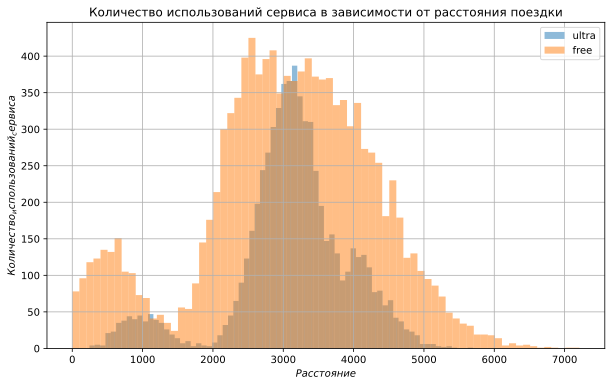

Описание датафрейма 'go_ultra':
count    6500.0
mean     3115.0
std       837.0
min       244.0
25%      2785.0
50%      3149.0
75%      3561.0
max      5700.0
Name: distance, dtype: float64

Описание датафрейма 'go_free':
count    11568.0
mean      3045.0
std       1246.0
min          1.0
25%       2367.0
50%       3115.0
75%       3906.0
max       7211.0
Name: distance, dtype: float64


In [42]:
# Срвнение столбцов 'distance' в 'ultra_go' и 'free_go'
quantity_go_comparison(
    ultra_go, 
    free_go, 
    'distance', 
    int(free_go['distance'].max()/100), 
    'Расстояние', 
    'Количество_ использований_ сервиса', 
    'Количество использований сервиса в зависимости от расстояния поездки', 
    'ultra', 
    'free'
)

Дистанция поездок при использовании подписки 'free' более разнообразна. Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки 'ultra'. Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки 'free' больше на 409 метров, чем при использовании подписки 'ultra'. Средняя дистанция при использовании подписки 'free' короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем при использовании 'ultra'.

При использовании обоих подписок наблюдается два пика. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так меньший пик 'ultra' находится в районе 1000 метров, а основной в районе 3100 метров с небольшой коррекцией около 4000 метров. Меншьй пик 'free' в районе 700 метров, а основной 2500-3500 метров. В целом пики 'ultra' более выраженные и имеют меньший разрбос.

Сравнение столбцов: duration


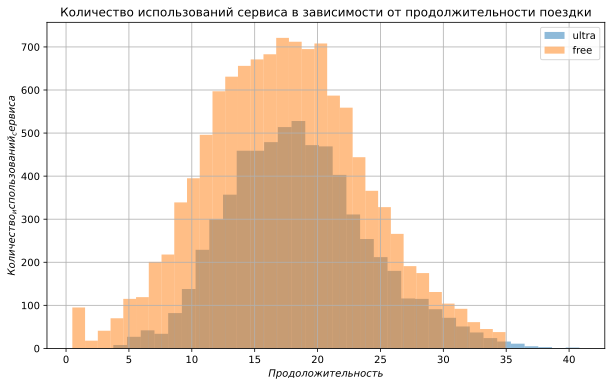

Описание датафрейма 'go_ultra':
count    6500.0
mean       19.0
std         6.0
min         4.0
25%        15.0
50%        18.0
75%        22.0
max        41.0
Name: duration, dtype: float64

Описание датафрейма 'go_free':
count    11568.0
mean        17.0
std          6.0
min          0.0
25%         13.0
50%         17.0
75%         22.0
max         35.0
Name: duration, dtype: float64


In [43]:
# Срвнение столбцов 'duration' в 'ultra_go' и 'free_go'
quantity_go_comparison(
    ultra_go, 
    free_go, 
    'duration', 
    int(free_go['duration'].max()), 
    'Продоложительность', 
    'Количество_ использований_ сервиса', 
    'Количество использований сервиса в зависимости от продолжительности поездки', 
    'ultra', 
    'free'
)

Продолжительность поездок при использовании подписки 'free' немного меньше по всем показателям, чем при использовании 'ultra'. Например, минимальное время меньше на 3.26 минут, а максимальное меньше на 5.88 минут. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут. При использовании подписки 'free' наблюдается пик в около 100 поездок с продолжительностью около 1 минуты.

Сравнение столбцов: month


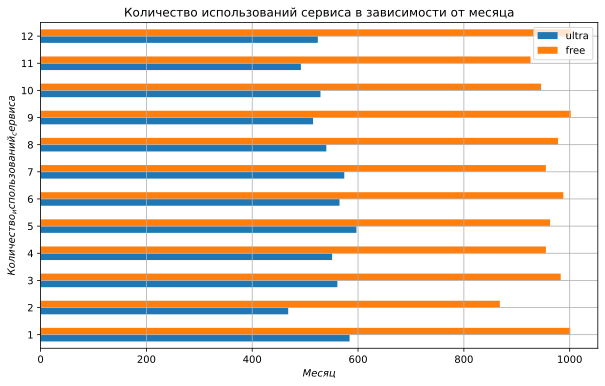

Значения датафрейма:
       ultra  free
month             
1        584  1001
2        468   868
3        561   983
4        551   955
5        597   963
6        565   988
7        574   955
8        540   978
9        515  1002
10       529   946
11       492   926
12       524  1003

Распределение долей всего датафрейма:
          ultra      free
month                    
1      0.032322  0.055402
2      0.025902  0.048041
3      0.031049  0.054406
4      0.030496  0.052856
5      0.033042  0.053299
6      0.031271  0.054682
7      0.031769  0.052856
8      0.029887  0.054129
9      0.028503  0.055457
10     0.029278  0.052358
11     0.027230  0.051251
12     0.029002  0.055513

Описание датафрейма:
            ultra         free
count   12.000000    12.000000
mean   541.666667   964.000000
std     38.120224    38.863397
min    468.000000   868.000000
25%    521.750000   952.750000
50%    545.500000   970.500000
75%    567.250000   991.250000
max    597.000000  1003.000000


In [44]:
# Срвнение столбцов 'month' в 'ultra_go' и 'free_go'
quality_go_comparison(
    ultra_go, 
    free_go, 
    'month', 
    'Месяц', 
    'Количество_ использований_ сервиса', 
    'Количество использований сервиса в зависимости от месяца', 
    'ultra', 
    'free',
)

Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков 'ultra' приходится на июнь, а у подписчиков 'free' на июль. При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре. Максимум поездок с подпиской 'ultra' в мае (597 поездок, это 3.3% от всех поездок). Максимумы поездок с подпиской 'free' в январе (1001 поездка, это 5.54% от всех поездок), сентябре (1002 поездки) и декабре (1003 поездки). При использовании подписки 'free' нет выраженной сезонности, кроме спдов в феврале и ноябре. При использовании подписки 'ultra' наблюдается более выраженная сезонность. Количество поездок растет с февраля по май, а затем медленно снижается до ноября.

Выводы из сравнения использования разных типов подписки:
1. **Общее количество**. Поездок с исползьзованием подписки 'free' на 5068 больше, чем с использованием подписки 'ultra', и составляет 11568.
1. **Возраст**. Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской 'free'.
1. **Дистанция**. Дистанция поездок при использовании подписки 'free' более разнообразна. Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки 'ultra'. Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки 'free' больше на 409 метров, чем при использовании подписки 'ultra'. Средняя дистанция при использовании подписки 'free' короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем при использовании 'ultra'. При использовании обоих подписок наблюдается два пика. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так меньший пик 'ultra' находится в районе 1000 метров, а основной в районе 3100 метров с небольшой коррекцией около 4000 метров. Меншьй пик 'free' в районе 700 метров, а основной 2500-3500 метров. В целом пики 'ultra' более выраженные и имеют меньший разрбос.
1. **Продолжительность**. Продолжительность поездок при использовании подписки 'free' немного меньше по всем показателям, чем при использовании 'ultra'. Например, минимальное время меньше на 3.26 минут, а максимальное меньше на 5.88 минут. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут. При использовании подписки 'free' наблюдается пик в около 100 поездок с продолжительностью около 1 минуты.
1. **Месяцы**. Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков 'ultra' приходится на июнь, а у подписчиков 'free' на июль. При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре. Максимум поездок с подпиской 'ultra' в мае (597 поездок, это 3.3% от всех поездок). Максимумы поездок с подпиской 'free' в январе (1001 поездка, это 5.54% от всех поездок), сентябре (1002 поездки) и декабре (1003 поездки). При использовании подписки 'free' нет выраженной сезонности, кроме спдов в феврале и ноябре. При использовании подписки 'ultra' наблюдается более выраженная сезонность. Количество поездок растет с февраля по май, а затем медленно снижается до ноября.
1. **Города**. Во всех городах доминирует подписка 'free'. Пятигорск  является лидером по использованию этиго типа подписки (1672 поездок). Ростов-на-Дону является лидером по использованию подписки 'ultra' (885 поездок).

#### Шаг 5. Подсчёт выручки

##### Создание датафрейма, агрегированного по пользователям, на основе 'total_go'

Требуется найти для каждого пользователя за каждый месяц:
1. Суммарное расстояние;
1. Количество поездок;
1. Суммарное время.

In [45]:
# Округление продолжительности поездок в 'duration'
# в общей таблице 'total_go'
total_go['duration'] = np.ceil(total_go['duration'])
# Создание сводной таблицы
users_months_go = total_go.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=('count', 'sum'))
# Переименование "двухэтажных" названий столбцов
users_months_go.columns = [
    'count', 'distance', 
    'count2', 'duration', 
    'count3', 'minute_price',
    'count4', 'start_ride_price', 
    'count5', 'subscription_fee'
]
# Удаление дублирующих столбцов с подсчитанным количеством строк 
users_months_go = users_months_go.drop(['count2', 'count3', 'count4', 'count5'], axis=1)
# Приведение столбцов с ценами к целевому состоянию
users_months_go['start_ride_price'] = users_months_go['start_ride_price'] / users_months_go['count']
users_months_go['minute_price'] = users_months_go['minute_price'] / users_months_go['count']
#users_months_go.loc[users_months_go['minute_price'] > 0] = 8
users_months_go['subscription_fee'] = users_months_go['subscription_fee'] / users_months_go['count']

users_months_go

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0           6.0               0.0   
        4          1    754.159807       7.0           6.0               0.0   
        8          2   6723.470560      46.0           6.0               0.0   
        10         2   5809.911100      32.0           6.0               0.0   
        11         3   7003.499363      56.0           6.0               0.0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0           8.0              50.0   
        8          2   7622.453034      48.0           8.0              50.0   
        9          1   4928.173852      23.0           8.0              50.0   
        11         4  13350.015305      78.0           8.0              50.0   
        12         1   2371.711192      16.0           8.0              50.0   

               subscription_fee  
user_id month                    
1       1                 199.0  
        4                 199.0  
        8                 199.0  
        10                199.0  
        11                199.0  
...                         ...  
1534    6                   0.0  
        8                   0.0  
        9                   0.0  
        11                  0.0  
        12                  0.0  

[11331 rows x 6 columns]

##### Добавление столбца в агрегированный датафрейм с помесечной выручкой по каждому пользователю

Найдите суммарное расстояние, кличество поездок и суммарное время для каждого пользователя за каждый месяц.

In [46]:
# Расчет и округление выручки
users_months_go['revenue'] = (
    (users_months_go['start_ride_price'] * users_months_go['count']) 
    + (users_months_go['minute_price'] * users_months_go['duration']) 
    + users_months_go['subscription_fee']
)
users_months_go['revenue'] = users_months_go['revenue'].astype('uint16')
# Удаление столбцов со вспомогательными данными
users_months_go = users_months_go.drop(['start_ride_price', 'minute_price'], axis=1)

users_months_go.head(10)

count      distance  duration  subscription_fee  revenue
user_id month                                                          
1       1          2   7027.511294      42.0             199.0      451
        4          1    754.159807       7.0             199.0      241
        8          2   6723.470560      46.0             199.0      475
        10         2   5809.911100      32.0             199.0      391
        11         3   7003.499363      56.0             199.0      535
        12         2   6751.629942      28.0             199.0      367
2       3          3  10187.723006      63.0             199.0      577
        4          2   6164.381824      40.0             199.0      439
        6          1   3255.338202      14.0             199.0      283
        7          2   6780.722964      48.0             199.0      487

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки, чем без неё?

Нулевая и альтернативная гипотезы:
<br>
**Гипотеза Н0**: Средняя продолжительность поездок с подпиской 'ultra' и 'free' равна. 
<br>
**Гипотеза Н1**: Средняя продолжительность поездок с подпиской 'ultra' меньше, чем с подпиской 'free'.

In [47]:
results = st.ttest_ind(ultra_go['duration'], free_go['duration'], equal_var=False, alternative='less')
print(results.pvalue)
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.0
Не получилось отвергнуть нулевую гипотезу


**Вывод**. Не получилось отвергнуть гипотезу о том, что средняя продолжительность поездок с подпиской 'ultra' равна (или больше), чем с подпиской 'free'.

##### Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

3130 метров - оптимальное расстояние с точки зрения износа самоката

Нулевая и альтернативная гипотезы:
<br>
**Гипотеза Н0**: Среднее расстояние поездок с использованием подписки 'ultra' равно оптимальному расстоянию в 3130 метров.
<br>
**Гипотеза Н1**: Среднее расстояние поездок с использованием подписки 'ultra' более 3130 метров. 

In [48]:
results = st.ttest_1samp(ultra_go['distance'], 3130, alternative='greater')
print(results.pvalue)
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод**. Не получилось отвергнуть гипотезу о том, что среднее расстояние поездок с использованием подписки 'ultra' (меньше или) равно 3130 метров.

##### Помесчячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки? Сделать выводы

Нулевая и альтернативная гипотезы:
<br>
**Гипотеза Н0**: Средняя выручка от поездок с разной подпиской равна.
<br>
**Гипотеза Н1**: Средняя выручка от поездок с использованием подписки 'ultra' меньше, чем выручка с ипользованием подписки 'free'. 

In [49]:
results = st.ttest_ind(
    users_months_go.loc[users_months_go['subscription_fee'] > 0, 'subscription_fee'],
    users_months_go.loc[users_months_go['subscription_fee'] == 0, 'subscription_fee'],
    equal_var=False,
    alternative='less'
)

print(results.pvalue)
if results.pvalue < .05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

1.0
Не получилось отвергнуть нулевую гипотезу


/tmp/ipykernel_324/3775444445.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results = st.ttest_ind(


**Вывод**. 
Не получилось отвергнуть нулевую гипотезу о том, что средняя выручка от поездок с использованием подписки 'ultra' (больше или) равна средней выручке с ипользованием подписки 'free'.

Значит, как минимум, выручка от подписки 'ultra' не меньше, чем от плитки 'free', и её следует развивать. 

##### Каким тестом проверить гипотезу о снижении количества пользовательских обращений после обновления сервиса, с которым взаимодействует мобильное приложение?

Сначала требуется провести сравнение выборок на предмет соответствия уникальных пользователей в них.

Если списки уникальных пользователей в них совпадают, то ***выборки зависимы*** и для проверки гипотезы потребуется тест st.ttest_rel(before, after, alternative='less')

В ином случае, ***выборки не могут быть зависимы*** и для проверки гипотезы потребуется тест: st.ttest_ind(before, after, equal_var=False, alternative='less'). Где, equal_var=False, т.к. выборки не равны, а alternative='less', т.к. основная гипотеза отвергается, если изначально обращений было меньше, чем после обновлений сервиса. 

#### Шаг 7. Распределения

**Задача №1**. Требуется выполнить план по продлению подписки 100 клиентами путем рассылки промокодов. Ранее вероятность продления была 10%. Требуется обеспечить выполнение плана с вероятностью неуспеха не более 5%. Построить график и ответить на вопрос. Сколько нужно разослать промокодов?

In [50]:
# Функция расчета количества успешных экспериментов Бернулли
# путем аппроксимации биномиального распределения нормальным
def cnsbe(n, p, x):
    # Расшифровка названия функции:
    # cnsbe - calculation of the number of successful Bernoulli experiments 
    # by approximating the binomial distribution by the normal
    # (расчет количества успешных экспериментов Бернулли 
    # путем аппроксимации биномиального распределения нормальным)
    
    # Параметры биноминального распределения:
    # n - количество экспериментов
    # p - вероятность успеха
    
    # x - вероятность расчитываемого значения
    
    # Расчет параметров нормального распределения
    mu = n * p
    sigma = (n * p * (1 - p))**.5
    # Расчет нормального распределения
    distr = st.norm(mu, sigma)
    
    # Расчет значения для заданной вероятности x
    result = distr.ppf(x)
    
    # Построение графика
    arange = np.arange(
        (mu - 4 * sigma), 
        (mu + 4 * sigma), 
        1
    )
    plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
    plt.axvline(x=result, color='red')
    plt.show()
    
    return result


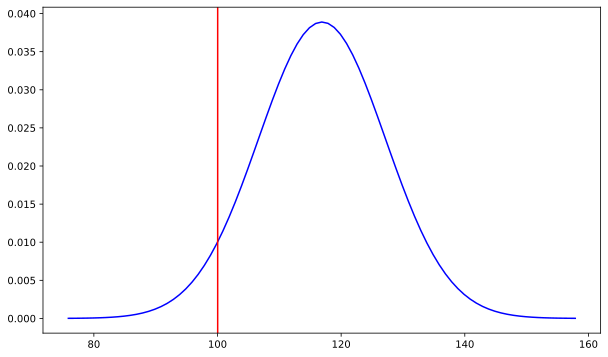

100.02841955223582

In [51]:
cnsbe(1169, .1, .05)

Требуется разослать 1169 промокодов, которые приводят к продлению подписки с вероятностью 10%, чтобы 100 клиентов продлили подписку с вероятностью неуспеха не более 5%.

Альтернативное решение

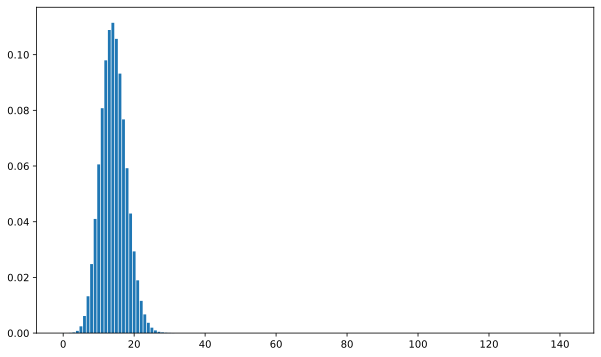

Требуется произвести 142 действия для получения 10 успешных результатов с вероятностью 95.0% при вероятности успеха 10.0%.


In [52]:
# Функция поиска количества всех попыток экспериментов Бернули n
# которые приводят к желаемому количеству успешных попыток kn
# с определенной вероятностью kp при вероятносте успеха p
def search_binom_n(kn, kp, p):
    # kn - требуемое количество успешных попыток
    # p  - известная вероятность успешных попыток
    # kp - с какой вероятностью нужно получить kn
    kp = 1 - kp
    
    # Общее количество попыток n должно быть не менее 
    # количества успешных попыток kn
    n = kn
    # Тригер успеха
    result = False
    
    # Повторять цикл, пока количество всех попыток n не станет достаточным 
    # для получения требуемого количества успешных попыток kn с вероятностью kp
    while result == False:
        # Вероятности
        distr = []
        # Значения
        k_nums = []
        
        # Построение биноминального распределения
        for k in range(0, n + 1):
            choose = factorial(n) / (factorial(k) * factorial(n - k))
            prob = choose * p**k * (1 - p)**(n - k)
            distr.append(prob)
            k_nums.append(k)
        
        # Проверка параметров распределения
        # на соответствие условиям
        p_sum = 0
        j = 0
        # Сложение вероятностей полученного биноминального распределения
        # до получения значения 
        for i in distr:
            p_sum += i
            j += 1
            # Если сумма сложенных вероятностей равна 
            # ожидаемой вероятности pk получения pn, 
            # то завершить цикл сложения
            if p_sum >= kp: break
        
        # Если значением k при вероятности kp меньше kn,
        # то увеличить n и продолжить расчеты
        if k_nums[j] < kn:
            n += 1
        # Если найдено такое n, которое дает результат kn 
        # с вероятностью kp, то завершить расчеты 
        else:
            result = True
            plt.bar(k_nums, distr);
            plt.show()
            break
    
    return n

k = 10
kp = .95
p = .1
print(f'Требуется произвести {search_binom_n(k, kp, p)} действия для получения {k} успешных результатов с вероятностью {kp*100}% при вероятности успеха {p*100}%.')

Идея фунцкии верная. Однако, для получения результата не хватает вычислительных ресурсов при расчете факториалов с заданными параметрами. Вероятно, есть схожая схема расчета, менее требовательная к вычислительным ресурсам.

С помощью созданной функции получилось произвести расчеты для выполнения плана в 10 раз меньше. Для 10 продлений подписки с вероятностью 95%, требуется разослать 142 промокода, которые приводят к продлению подписки с вероятностью 10%. Исходя из полученного результата можно предположить, что при увеличении количества плановых продлений в 10 раз, также увеличится количество разосланных промокодов приблизительно в 10 раз. Если это так, то требуется разослать 1420 промокодов.

**Задача №2**. Планируется разослать клиентам 1 млн. уведомлений, которые клиенты открывают с вероятностью 40%. Требуется с помощью аппроксимации построить график распределения и оценить вероятность того, что не более 399.5 тыс. клиентов откроют уведомления. 

In [53]:
# Функция расчета вероятности проведения успешных экспериментов Бернули
# путем аппроксимации биномиального распределения нормальным
def cpsbe(n, p, x):
    # Расшифровка названия функции:
    # cpsbe - calculation of the probability of successful Bernoulli experiments
    # by approximating the binomial distribution by the normal
    # (расчет вероятности проведения успешных экспериментов Бернули 
    # путем аппроксимации биномиального распределения нормальным)
    
    # Параметры биноминального распределения:
    # n - количество экспериментов
    # p - вероятность успеха
    
    # x - заданное значение, для которого расчитывается вероятность
    
    # Расчет параметров нормального распределения
    mu = n * p
    sigma = (n * p * (1 - p))**.5
    # Расчет нормального распределения
    distr = st.norm(mu, sigma)
    
    # Расчет вероятности для заданного значения x
    result = distr.cdf(x)
    
    # Построение графика
    arange = np.arange(
        (mu - 4 * sigma), 
        (mu + 4 * sigma), 
        1
    )
    plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
    plt.axvline(x=x, color='red')
    plt.show()
    
    return result


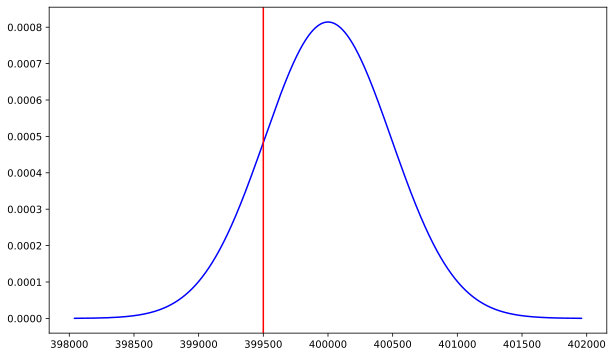

0.15371708296369768

In [54]:
cpsbe(1000000, .4, 399500)

399.5 тыс. клиентов откроют уведомления с вероятностью 15.37%, если разослать 1 млн. уведомлений, которые открывают клиенты с вероятностью 40%.

#### Выводы проекта

Основная цель проекта достигнута. Проанализированы данные сервиса аренды самокатов GoFast и проверены некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Описание исходных данных**

В исходных данных есть информация о пользователях, их поездках и подписках, сгруппированных в три файла.

1. Пользователи — *'users_go.csv'*:
 - 'user_id' - уникальный идентификатор пользователя;
 - 'name' - имя пользователя;
 - 'age' - возраст;
 - 'city' - город;
 - 'subscription_type' - тип подписки (free, ultra). 

2. Поездки — *'rides_go.csv'*:
 - user_id' - уникальный идентификатор пользователя;
 - 'distance' - расстояние, которое пользователь проехал в текущей сессии (в метрах);
 - 'duration' - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
 - 'date' - дата совершения поездки.

3. Подписки — *'subscriptions_go.csv'*:
 - 'subscription_type' - тип подписки;
 - 'minute_price' - стоимость одной минуты поездки по данной подписке;
 - 'start_ride_price' - стоимость начала поездки;
 - 'subscription_fee' - стоимость ежемесячного платёж. 

**Выполненные работы**

В ходе проекта были проделаны следующие шаги:
1. Загрузка данных.
2. Предобработка данных.
 - Корректировка типов данных столбцов.
 - Добавление столбцов.
 - Обработка неявных дубликатов.
 - Проверка результатов предобработки данных.
3. Исследовательский анализ данных:
 - Частота встречаемости городов.
 - Соотношение пользователей с подпиской и без нее.
 - Возраст пользователей.
 - Расстояние, которое пользователь преодолел за одну поездку.
 - Продолжительность поездок.
 - Сделаны промежуточные выводы исследовательского анализа.
4. Объединение данных.
 - Объединение данных о пользователях, поездках и подписках в один датафрейм методом merge().
 - Создание двух датафреймов с пользователями, имеющими подписку и без нее, на основе общего датафрейма.
 - Визуализация данных из датафреймов, разделенных на пользователей с подпиской и без.
5. Подсчёт выручки.
 - Создание датафрейма, агрегированного по пользователям, на основе 'total_go'
 - Добавление столбца в агрегированный датафрейм с помесечной выручкой по каждому пользователю
6. Проверка гипотез:
 - Тратят ли пользователи с подпиской больше времени на поездки?
 - Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
 - Помесчячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? Сделать выводы.
 - Каким тестом проверить гипотезу о снижении количества пользовательских обращений после обновления сервиса, с которым взаимодействует мобильное приложение?
7. Распределения:
 - Задача №1.
 - Задача №2.

**Выводы**

Все исходные данные во всех файлах не содержали пропусков, значительных выбросов, а также дубликатов, кроме тех, которые были обнаружены в файле 'users_go.csv'. При копировании данных из файлов в датафреймы, данные столбцов были не в оптимальном состоянии. В ходе предобработки данных они были оптимизированы для целей данного проекта.

В ходе исследовательского анализа данных было выявлено:
- Пользователей с подпиской "free" всего 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской "ultra".
- Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.
- Большая часть всех пользователей используют подписку "free". Всего их 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской "ultra".
- Максимальное количество в 219 поездок совершено в Пятигорске. Минимальное количество в 168 поездок совершено в Москве.
- За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.
- Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность в 18 минут является как наиболее распространенной так и медианным значением. Наблюдается выброс размером менее 100 поездок с продолжительностью в 1 минуту.

В результате группировки данных выявлено:

- Поездок с исползьзованием подписки 'free' на 5068 больше, чем с использованием подписки 'ultra', и составляет 11568.
- Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской 'free'.
- Дистанция поездок при использовании подписки 'free' более разнообразна. Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки 'ultra'. Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки 'free' больше на 409 метров, чем при использовании подписки 'ultra'. Средняя дистанция при использовании подписки 'free' короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем при использовании 'ultra'. При использовании обоих подписок наблюдается два пика. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так меньший пик 'ultra' находится в районе 1000 метров, а основной в районе 3100 метров с небольшой коррекцией около 4000 метров. Меншьй пик 'free' в районе 700 метров, а основной 2500-3500 метров. В целом пики 'ultra' более выраженные и имеют меньший разрбос.
- Продолжительность поездок при использовании подписки 'free' немного меньше по всем показателям, чем при использовании 'ultra'. Например, минимальное время меньше на 3.26 минут, а максимальное меньше на 5.88 минут. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут. При использовании подписки 'free' наблюдается пик в около 100 поездок с продолжительностью около 1 минуты.
- Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков 'ultra' приходится на июнь, а у подписчиков 'free' на июль. При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре. Максимум поездок с подпиской 'ultra' в мае (597 поездок, это 3.3% от всех поездок). Максимумы поездок с подпиской 'free' в январе (1001 поездка, это 5.54% от всех поездок), сентябре (1002 поездки) и декабре (1003 поездки). При использовании подписки 'free' нет выраженной сезонности, кроме спдов в феврале и ноябре. При использовании подписки 'ultra' наблюдается более выраженная сезонность. Количество поездок растет с февраля по май, а затем медленно снижается до ноября.
- Во всех городах доминирует подписка 'free'. Пятигорск является лидером по использованию этиго типа подписки (1672 поездок). Ростов-на-Дону является лидером по использованию подписки 'ultra' (885 поездок).


Не получилось отвергнуть ни одну из выдвинутых нулевых гипотез. Например, гипотезу о том, что средняя продолжительность поездок с подпиской 'ultra' равна (или больше) средней продолжительности с подпиской 'free'. Или гипотезу о том, что среднее расстояние поездки с использованием подписки 'ultra' равно (или менее) 3130 метрам. Или гипотезу о том, что средняя выручка от поездок с использованием подписки 'ultra' равна (или больше) средней выручке с ипользованием подписки 'free'.

В задачах на распределение подсчитано:
- Требуется разослать 1169 промокодов, которые приводят к продлению подписки с вероятностью 10%, чтобы 100 клиентов продлили подписку с вероятностью неуспеха не более 5%.
- 399.5 тыс. клиентов откроют уведомления с вероятностью 15.37%, если разослать 1 млн. уведомлений, которые открывают клиенты с вероятностью 40%.